In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import downloaded data for monthly average list and sale prices
list_data=pd.read_csv("data/zillow/Metro_mlp_uc_sfrcondo_raw_month.csv") # monthly data
# list_data=pd.read_csv("data/zillow/Metro_mlp_uc_sfrcondo_smoothed_week.csv") # weekly data
list_data

,RegionID,SizeRank,RegionName,RegionType,StateName,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,...,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
0,102001,0,United States,Country,NaN,274900.0,269900.0,270000.0,279000.0,289000.0,...,340000.0,342400.0,344000.0,343400.0,339000.0,330099.0,329900.0,340000.0,354000.0,372000.0
1,394913,1,"New York, NY",Msa,NY,524000.0,519000.0,519900.0,539000.0,549000.0,...,630000.0,649000.0,649900.0,655000.0,659000.0,660000.0,669000.0,674900.0,675000.0,668000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,795000.0,799000.0,799000.0,809000.0,840000.0,...,954000.0,975000.0,959000.0,975000.0,989900.0,999000.0,998000.0,999800.0,1015944.0,999999.0
3,394463,3,"Chicago, IL",Msa,IL,300000.0,297990.0,299000.0,319499.0,338999.0,...,349900.0,349900.0,350000.0,349000.0,339000.0,332500.0,325000.0,340000.0,349900.0,350000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,339990.0,340990.0,345000.0,350000.0,359990.0,...,359900.0,359900.0,359999.0,355000.0,350000.0,349900.0,349900.0,352900.0,360000.0,372000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,394711,92,"Jackson, MS",Msa,MS,231874.0,235660.0,231780.0,231780.0,236512.0,...,288802.0,287903.0,287903.0,289900.0,288900.0,284999.0,279000.0,279000.0,271000.0,279500.0
93,394352,94,"Augusta, GA",Msa,GA,220000.0,219900.0,224900.0,228000.0,229900.0,...,251500.0,259900.0,265900.0,262900.0,252885.0,252280.0,254950.0,262380.0,271454.0,282000.0
94,394666,96,"Harrisburg, PA",Msa,PA,209219.0,209106.0,214761.0,223356.0,237492.0,...,288270.0,282615.0,282615.0,284900.0,265900.0,269000.0,269900.0,284900.0,299000.0,305985.0
95,395006,100,"Provo, UT",Msa,UT,378657.0,377634.0,383774.0,404242.0,409308.0,...,457602.0,469716.0,478848.0,477916.0,496337.0,496348.0,500000.0,499990.0,500000.0,529900.0


In [3]:
sale_data=pd.read_csv("data/zillow/Metro_median_sale_price_uc_SFRCondo_raw_month.csv") # monthly data
# sale_data=pd.read_csv("data/zillow/Metro_median_sale_price_uc_SFRCondo_smoothed_week.csv") # weekly data
sale_data

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31
0,102001,0,United States,Country,NaN,192500.0,196000.0,195000.0,197000.0,201900.0,...,274000.0,284900.0,286000.0,289900.0,290000.0,292500.0,290000.0,285000.0,290000.0,305000.0
1,394913,1,"New York, NY",Msa,NY,NaN,NaN,NaN,NaN,NaN,...,450000.0,447000.0,457550.0,460000.0,469900.0,477000.0,470000.0,470000.0,475000.0,484000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,510000.0,500000.0,500000.0,489000.0,485000.0,...,690000.0,715000.0,730000.0,740000.0,740000.0,732000.0,730000.0,725000.0,750000.0,780000.0
3,394463,3,"Chicago, IL",Msa,IL,250000.0,246000.0,249900.0,250000.0,255000.0,...,255000.0,265000.0,269400.0,265000.0,269000.0,260000.0,260000.0,253000.0,252000.0,270000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,145000.0,153350.0,152000.0,156000.0,160000.0,...,290000.0,300000.0,299500.0,298649.0,300745.0,300000.0,300000.0,294000.0,310000.0,321038.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,394711,92,"Jackson, MS",Msa,MS,127950.0,135000.0,132500.0,138000.0,141000.0,...,218000.0,226250.0,215450.0,211000.0,224250.0,230000.0,214300.0,215000.0,217000.0,220000.0
93,394352,94,"Augusta, GA",Msa,GA,121950.0,130750.0,125000.0,135000.0,142000.0,...,210000.0,213000.0,202050.0,205000.0,206635.0,214500.0,204000.0,200000.0,205000.0,215600.0
94,394666,96,"Harrisburg, PA",Msa,PA,159750.0,155000.0,162500.0,160000.0,165000.0,...,199000.0,219500.0,211250.0,205000.0,201500.0,211899.0,201500.0,193525.0,190000.0,205000.0
95,395006,100,"Provo, UT",Msa,UT,210000.0,220000.0,219000.0,218000.0,218990.0,...,361000.0,359000.0,373150.0,370500.0,370000.0,380000.0,391050.0,385000.0,395000.0,415000.0


In [4]:
# Filter list & sale data to Houston TX only
list_data_hou=list_data[list_data['RegionName'].str.contains('ouston')]
sale_data_hou=sale_data[sale_data['RegionName'].str.contains('ouston')]

In [5]:
print(list_data_hou)
print(sale_data_hou)

   RegionID  SizeRank   RegionName RegionType StateName  2017-11-30  \
6    394692         6  Houston, TX        Msa        TX    314407.0   

   2017-12-31  2018-01-31  2018-02-28  2018-03-31  ...  2020-07-31  \
6    317084.0    317337.0    321341.0    327192.0  ...    327202.0   

   2020-08-31  2020-09-30  2020-10-31  2020-11-30  2020-12-31  2021-01-31  \
6    331988.0    336969.0    337703.0    337000.0    332950.0    331990.0   

   2021-02-28  2021-03-31  2021-04-30  
6    336314.0    349000.0    355990.0  

[1 rows x 47 columns]
   RegionID  SizeRank   RegionName RegionType StateName  2008-02-29  \
6    394692         6  Houston, TX        Msa        TX    152000.0   

   2008-03-31  2008-04-30  2008-05-31  2008-06-30  ...  2020-06-30  \
6    153000.0    152000.0    157900.0    161500.0  ...    260000.0   

   2020-07-31  2020-08-31  2020-09-30  2020-10-31  2020-11-30  2020-12-31  \
6    268708.0    265000.0    262000.0    264186.0    267825.0    272000.0   

   2021-01-31  2021

In [6]:
list_data_hou_reformatted=pd.melt(list_data_hou, 
                                  id_vars=['RegionID','SizeRank','RegionName','RegionType','StateName'], 
                                  var_name='Date', 
                                  value_name='MedianListPrice')

In [7]:
list_data_hou_reformatted

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,MedianListPrice
0,394692,6,"Houston, TX",Msa,TX,2017-11-30,314407.0
1,394692,6,"Houston, TX",Msa,TX,2017-12-31,317084.0
2,394692,6,"Houston, TX",Msa,TX,2018-01-31,317337.0
3,394692,6,"Houston, TX",Msa,TX,2018-02-28,321341.0
4,394692,6,"Houston, TX",Msa,TX,2018-03-31,327192.0
5,394692,6,"Houston, TX",Msa,TX,2018-04-30,331597.0
6,394692,6,"Houston, TX",Msa,TX,2018-05-31,332085.0
7,394692,6,"Houston, TX",Msa,TX,2018-06-30,331494.0
8,394692,6,"Houston, TX",Msa,TX,2018-07-31,322220.0
9,394692,6,"Houston, TX",Msa,TX,2018-08-31,317434.0


In [8]:
sale_data_hou_reformatted=pd.melt(sale_data_hou, 
                                  id_vars=['RegionID','SizeRank','RegionName','RegionType','StateName'], 
                                  var_name='Date', 
                                  value_name='MedianSalePrice')
sale_data_hou_reformatted

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,MedianSalePrice
0,394692,6,"Houston, TX",Msa,TX,2008-02-29,152000.0
1,394692,6,"Houston, TX",Msa,TX,2008-03-31,153000.0
2,394692,6,"Houston, TX",Msa,TX,2008-04-30,152000.0
3,394692,6,"Houston, TX",Msa,TX,2008-05-31,157900.0
4,394692,6,"Houston, TX",Msa,TX,2008-06-30,161500.0
...,...,...,...,...,...,...,...
153,394692,6,"Houston, TX",Msa,TX,2020-11-30,267825.0
154,394692,6,"Houston, TX",Msa,TX,2020-12-31,272000.0
155,394692,6,"Houston, TX",Msa,TX,2021-01-31,261298.0
156,394692,6,"Houston, TX",Msa,TX,2021-02-28,274900.0


In [9]:
type(list_data_hou_reformatted['Date'])

pandas.core.series.Series

In [24]:
# merge list and sale data frames
all_data_hou_reformatted=pd.merge(list_data_hou_reformatted,
                                  sale_data_hou_reformatted, 
                                  on=['RegionID','SizeRank','RegionName','RegionType','StateName','Date'])

In [25]:
all_data_hou_reformatted

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,MedianListPrice,MedianSalePrice
0,394692,6,"Houston, TX",Msa,TX,2017-11-30,314407.0,225000.0
1,394692,6,"Houston, TX",Msa,TX,2017-12-31,317084.0,226900.0
2,394692,6,"Houston, TX",Msa,TX,2018-01-31,317337.0,218923.0
3,394692,6,"Houston, TX",Msa,TX,2018-02-28,321341.0,223900.0
4,394692,6,"Houston, TX",Msa,TX,2018-03-31,327192.0,230000.0
5,394692,6,"Houston, TX",Msa,TX,2018-04-30,331597.0,239990.0
6,394692,6,"Houston, TX",Msa,TX,2018-05-31,332085.0,242000.0
7,394692,6,"Houston, TX",Msa,TX,2018-06-30,331494.0,242000.0
8,394692,6,"Houston, TX",Msa,TX,2018-07-31,322220.0,243000.0
9,394692,6,"Houston, TX",Msa,TX,2018-08-31,317434.0,238000.0


In [26]:
all_data_hou_reformatted['Date'] = all_data_hou_reformatted['Date'].astype('datetime64[ns]')
all_data_hou_reformatted

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,MedianListPrice,MedianSalePrice
0,394692,6,"Houston, TX",Msa,TX,2017-11-30,314407.0,225000.0
1,394692,6,"Houston, TX",Msa,TX,2017-12-31,317084.0,226900.0
2,394692,6,"Houston, TX",Msa,TX,2018-01-31,317337.0,218923.0
3,394692,6,"Houston, TX",Msa,TX,2018-02-28,321341.0,223900.0
4,394692,6,"Houston, TX",Msa,TX,2018-03-31,327192.0,230000.0
5,394692,6,"Houston, TX",Msa,TX,2018-04-30,331597.0,239990.0
6,394692,6,"Houston, TX",Msa,TX,2018-05-31,332085.0,242000.0
7,394692,6,"Houston, TX",Msa,TX,2018-06-30,331494.0,242000.0
8,394692,6,"Houston, TX",Msa,TX,2018-07-31,322220.0,243000.0
9,394692,6,"Houston, TX",Msa,TX,2018-08-31,317434.0,238000.0


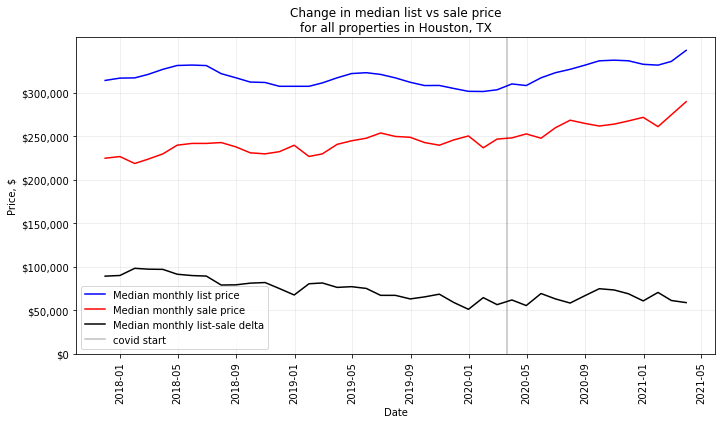

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(all_data_hou_reformatted['Date'],
           all_data_hou_reformatted['MedianListPrice'],
         'b', 
         label="Median monthly list price")
plt.plot(all_data_hou_reformatted['Date'],
           all_data_hou_reformatted['MedianSalePrice'],
         'r', 
         label="Median monthly sale price")
plt.plot(all_data_hou_reformatted['Date'],
           all_data_hou_reformatted['MedianListPrice']-all_data_hou_reformatted['MedianSalePrice'],
         'k', 
         label="Median monthly list-sale delta")
plt.xlabel("Date")
plt.ylabel("Price, $")
plt.title("Change in median list vs sale price\nfor all properties in Houston, TX")
plt.grid(alpha=0.25)
plt.xticks(rotation=90)
plt.tight_layout()

y_ticks=np.arange(0,350000,50000)
y_labels=pd.DataFrame(np.arange(0,350000,50000))[0].map("${:,}".format).to_list()
plt.yticks(y_ticks,y_labels)

import datetime as dt

plt.axvline(dt.datetime(2020, 3, 21), c='k', alpha=0.25, label="covid start")
plt.legend()